Dependencies

In [1]:
import numpy as np
# import alpaca
import matplotlib.pyplot as plt

from utils.epsilon import eps
from alpaca.parameters import params_general, params_gold, params_polystyrene
from alpaca.PSF import PSFclass

Load and adjust parameters

In [17]:
params = params_general()
# params = params_gold()
# params = params_polystyrene()

(Optionally) adjust parameters

In [3]:
# params.radius = 75  #nm
# params.wavelength = 600  #nm
# params.px_size = 65 #nm

Calculate and plot PSFs

In [18]:
number_of_PSFs = 11


PSF = PSFclass(params)
beta_vector = np.linspace(0,np.pi,number_of_PSFs)
# PSF_stack = np.zeros((PSF.num_px,PSF.num_px,number_of_PSFs))
PSF_stack = np.zeros((PSF.num_px,PSF.num_px*number_of_PSFs))

for i, beta in enumerate(beta_vector):
    PSF.beta = beta
    image = PSF.calc_PSF()
    s = slice(i*PSF.num_px,PSF.num_px+i*PSF.num_px)

    # PSF_stack[:,s] = image['PSF']    #no normalization
    PSF_stack[:,s] = image['PSF']/np.max(image['PSF'])   #normalize each PSF

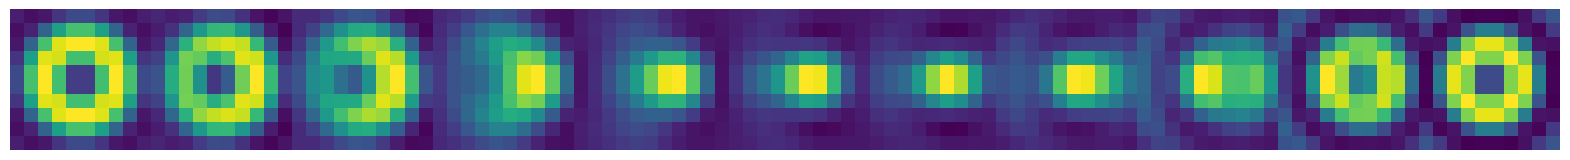

In [19]:
plt.figure(figsize=(20,5))
plt.imshow(PSF_stack)
plt.axis('off')
plt.show()